In [5]:
import pandas as pd
import numpy as np 

from sklearn.preprocessing import StandardScaler, LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [6]:
file_path = 'credit_card_fraud_dataset.csv'  
data = pd.read_csv(file_path)

In [7]:
data.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  object 
 2   Amount           100000 non-null  float64
 3   MerchantID       100000 non-null  int64  
 4   TransactionType  100000 non-null  object 
 5   Location         100000 non-null  object 
 6   IsFraud          100000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB


In [9]:
data.isnull().sum()

TransactionID      0
TransactionDate    0
Amount             0
MerchantID         0
TransactionType    0
Location           0
IsFraud            0
dtype: int64

In [10]:
data.describe()

,TransactionID,Amount,MerchantID,IsFraud
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,2497.092666,501.676070,0.010000
std,28867.657797,1442.415999,288.715868,0.099499
min,1.000000,1.050000,1.000000,0.000000
25%,25000.750000,1247.955000,252.000000,0.000000
50%,50000.500000,2496.500000,503.000000,0.000000
75%,75000.250000,3743.592500,753.000000,0.000000
max,100000.000000,4999.770000,1000.000000,1.000000


In [11]:
data = data.drop_duplicates()

In [12]:
label_encoder_type = LabelEncoder()
label_encoder_location = LabelEncoder()

data['TransactionType'] = label_encoder_type.fit_transform(data['TransactionType'])
data['Location'] = label_encoder_location.fit_transform(data['Location'])

transaction_type_mapping = dict(zip(label_encoder_type.classes_, range(len(label_encoder_type.classes_))))
location_mapping = dict(zip(label_encoder_location.classes_, range(len(label_encoder_location.classes_))))

transaction_type_inverse_mapping = {v: k for k, v in transaction_type_mapping.items()}
location_inverse_mapping = {v: k for k, v in location_mapping.items()}

In [13]:
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])

data['TransactionHour'] = data['TransactionDate'].dt.hour
data['TransactionDay'] = data['TransactionDate'].dt.day 
data['TransactionMonth'] = data['TransactionDate'].dt.month 

data = data.drop(columns=['TransactionDate'])

In [14]:
data.head()

,TransactionID,Amount,MerchantID,TransactionType,Location,IsFraud,TransactionHour,TransactionDay,TransactionMonth
0,1,4189.27,688,1,7,0,14,3,4
1,2,2659.71,109,1,1,0,13,19,3
2,3,784.00,394,0,4,0,10,8,1
3,4,3514.40,944,0,5,0,23,13,4
4,5,369.07,475,0,6,0,18,12,7


In [15]:
data.describe()

,TransactionID,Amount,MerchantID,TransactionType,Location,IsFraud,TransactionHour,TransactionDay,TransactionMonth
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,50000.500000,2497.092666,501.676070,0.501310,4.485300,0.010000,11.50084,15.782220,6.516240
std,28867.657797,1442.415999,288.715868,0.500001,2.876283,0.099499,6.91768,8.813795,3.448248
min,1.000000,1.050000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000
25%,25000.750000,1247.955000,252.000000,0.000000,2.000000,0.000000,6.00000,8.000000,4.000000
50%,50000.500000,2496.500000,503.000000,1.000000,4.000000,0.000000,12.00000,16.000000,7.000000
75%,75000.250000,3743.592500,753.000000,1.000000,7.000000,0.000000,17.00000,23.000000,10.000000
max,100000.000000,4999.770000,1000.000000,1.000000,9.000000,1.000000,23.00000,31.000000,12.000000


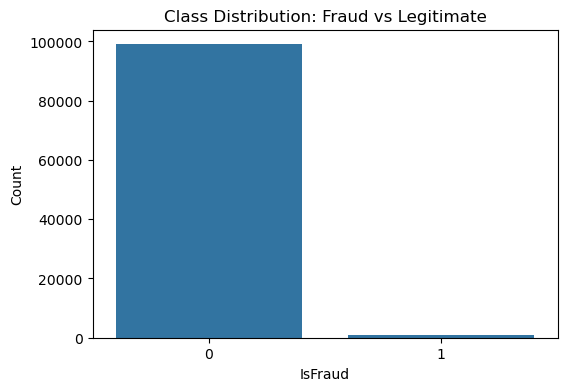

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='IsFraud', data=data)
plt.title('Class Distribution: Fraud vs Legitimate')
plt.xlabel('IsFraud')
plt.ylabel('Count')
plt.show()

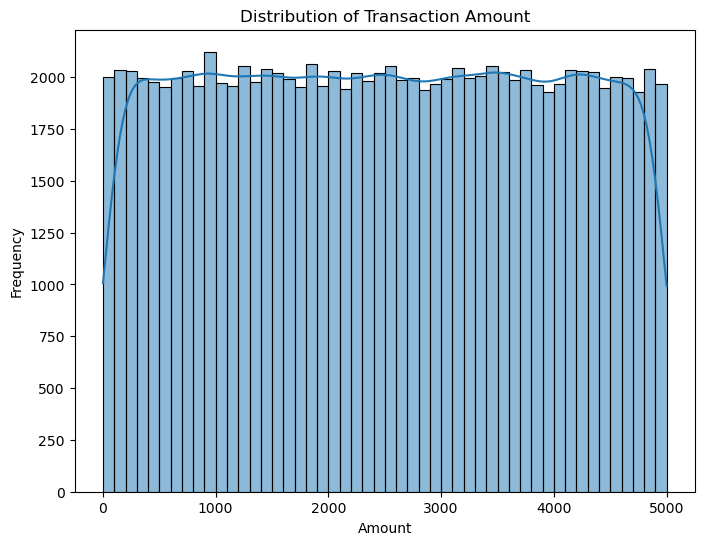

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

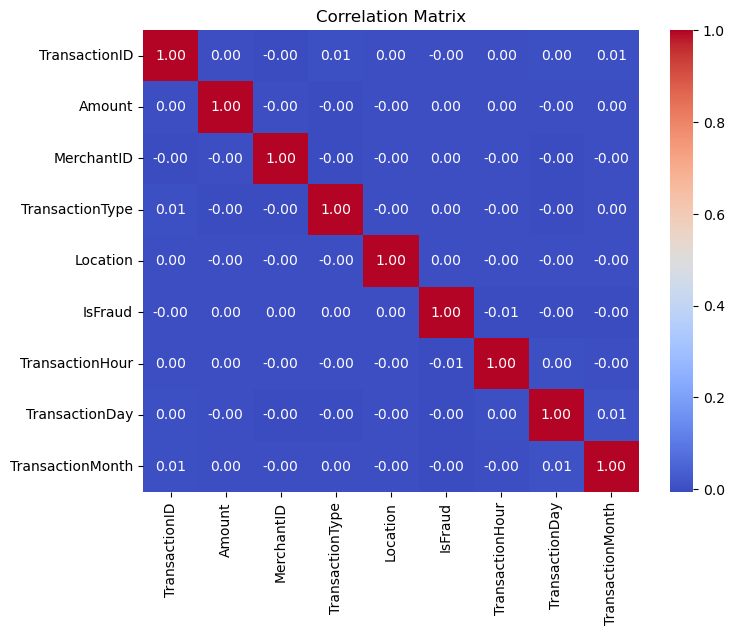

In [18]:
correlation = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

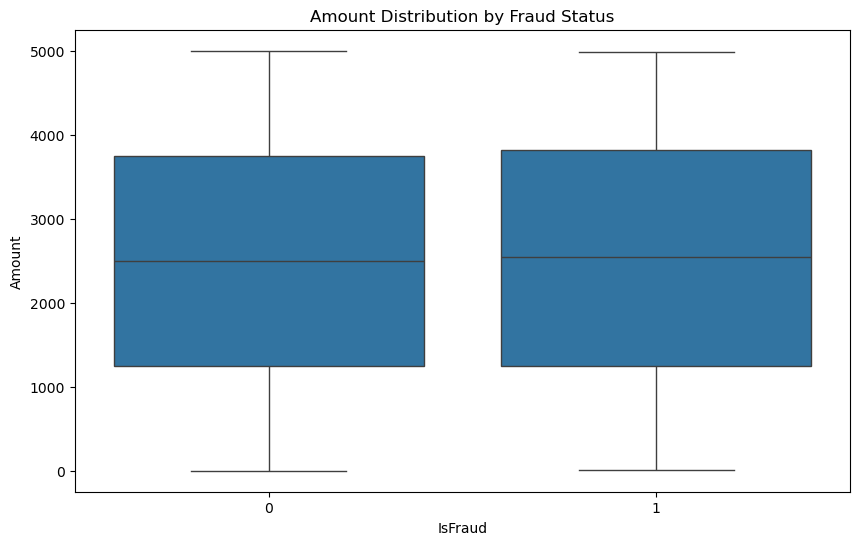

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsFraud', y='Amount', data=data)
plt.title('Amount Distribution by Fraud Status')
plt.xlabel('IsFraud')
plt.ylabel('Amount')
plt.show()

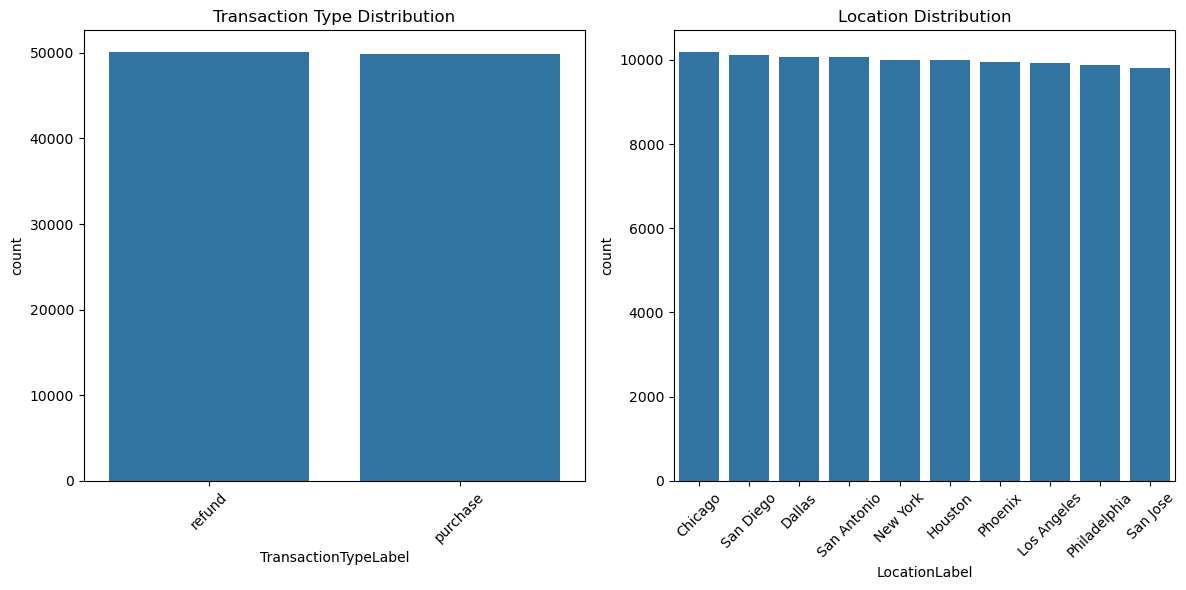

In [20]:
data['TransactionTypeLabel'] = data['TransactionType'].map(transaction_type_inverse_mapping)
data['LocationLabel'] = data['Location'].map(location_inverse_mapping)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='TransactionTypeLabel', data=data, order=data['TransactionTypeLabel'].value_counts().index)
plt.title('Transaction Type Distribution')
plt.xticks(rotation=45) 

plt.subplot(1, 2, 2)
sns.countplot(x='LocationLabel', data=data, order=data['LocationLabel'].value_counts().index)
plt.title('Location Distribution')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

/tmp/ipykernel_6791/2662000288.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LocationLabel', y='FraudCount', data=fraud_by_location, palette='viridis')
/tmp/ipykernel_6791/2662000288.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LocationLabel', y='TotalTransactions', data=total_transactions_by_location, palette='coolwarm')


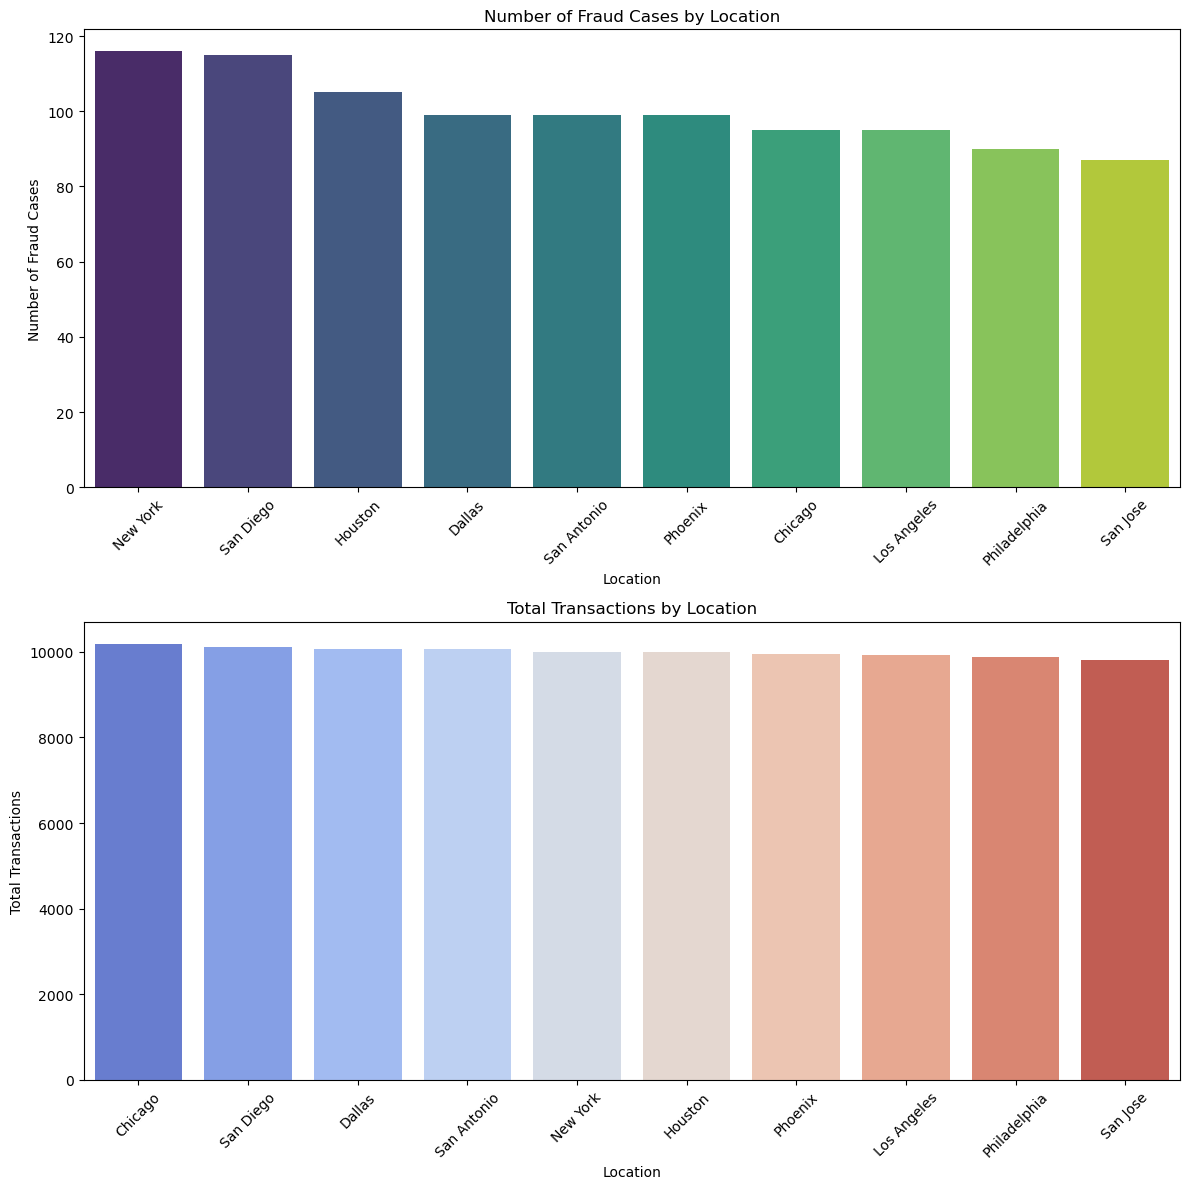

In [21]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)

fraud_by_location = data[data['IsFraud'] == 1].groupby('LocationLabel').size().reset_index(name='FraudCount')

fraud_by_location = fraud_by_location.sort_values(by='FraudCount', ascending=False)

# Create the barplot for fraud cases
sns.barplot(x='LocationLabel', y='FraudCount', data=fraud_by_location, palette='viridis')
plt.title('Number of Fraud Cases by Location')
plt.xlabel('Location')
plt.ylabel('Number of Fraud Cases')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)

total_transactions_by_location = data.groupby('LocationLabel').size().reset_index(name='TotalTransactions')

total_transactions_by_location = total_transactions_by_location.sort_values(by='TotalTransactions', ascending=False)

sns.barplot(x='LocationLabel', y='TotalTransactions', data=total_transactions_by_location, palette='coolwarm')
plt.title('Total Transactions by Location')
plt.xlabel('Location')
plt.ylabel('Total Transactions')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<AxesSubplot: xlabel='Amount', ylabel='TransactionHour'>

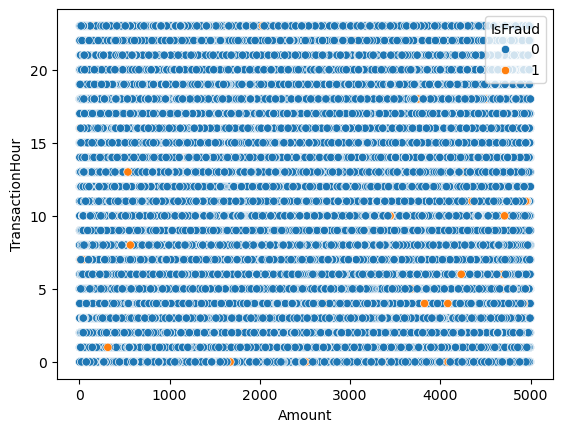

In [22]:
sns.scatterplot(x='Amount', y='TransactionHour', hue='IsFraud', data=data)

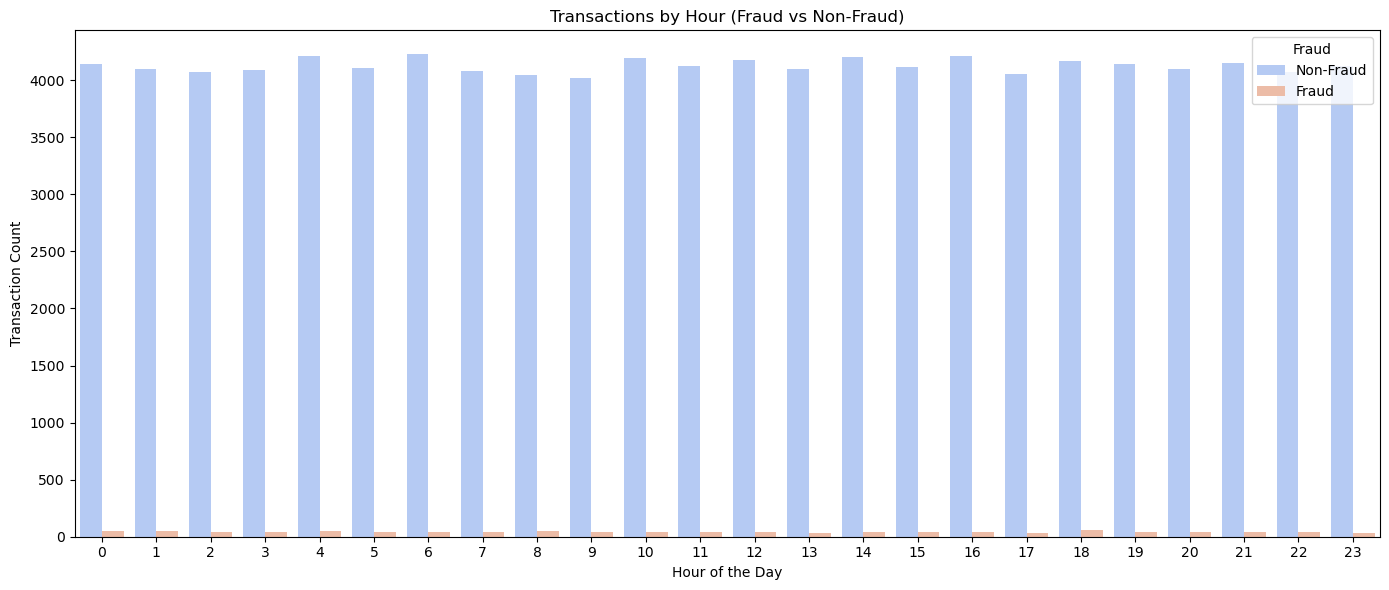

In [23]:
plt.figure(figsize=(14, 6))

sns.countplot(x='TransactionHour', hue='IsFraud', data=data, palette='coolwarm')
plt.title('Transactions by Hour (Fraud vs Non-Fraud)')
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Count')
plt.legend(title='Fraud', loc='upper right', labels=['Non-Fraud', 'Fraud'])
plt.tight_layout()
plt.show()

/tmp/ipykernel_6791/1370294751.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='IsFraud', y='Amount', data=data, palette='muted')


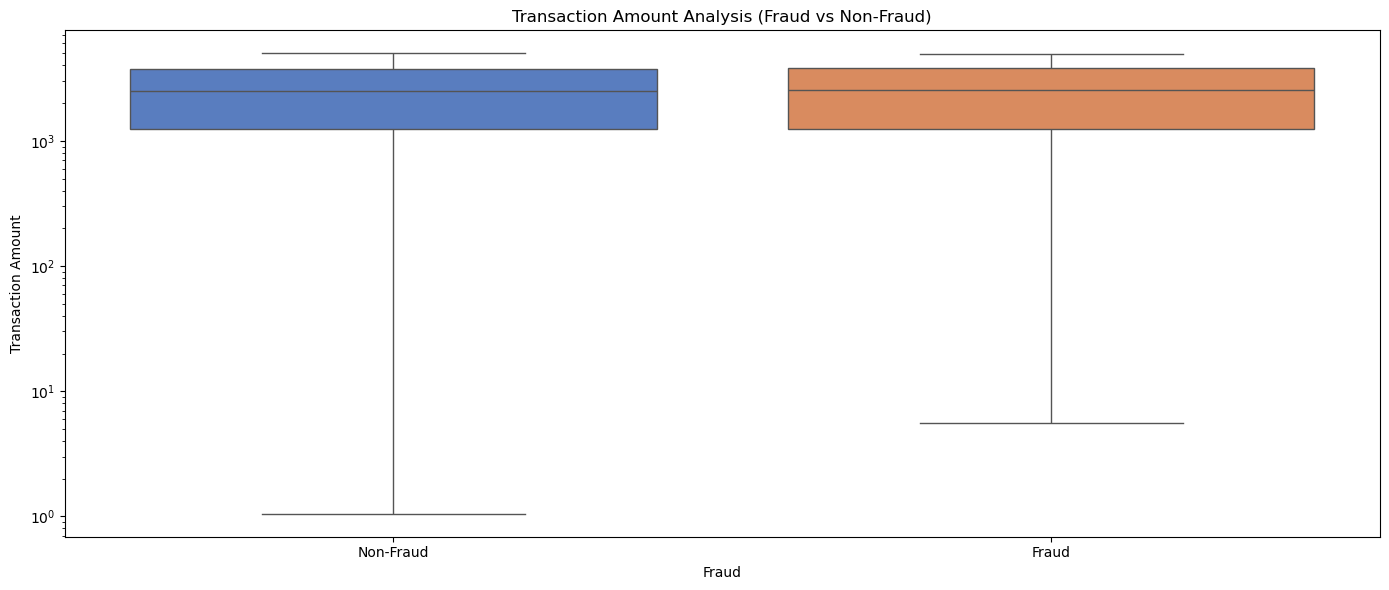

In [24]:
plt.figure(figsize=(14, 6))

sns.boxplot(x='IsFraud', y='Amount', data=data, palette='muted')
plt.title('Transaction Amount Analysis (Fraud vs Non-Fraud)')
plt.xlabel('Fraud')
plt.ylabel('Transaction Amount')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.yscale('log')  
plt.tight_layout()
plt.show()

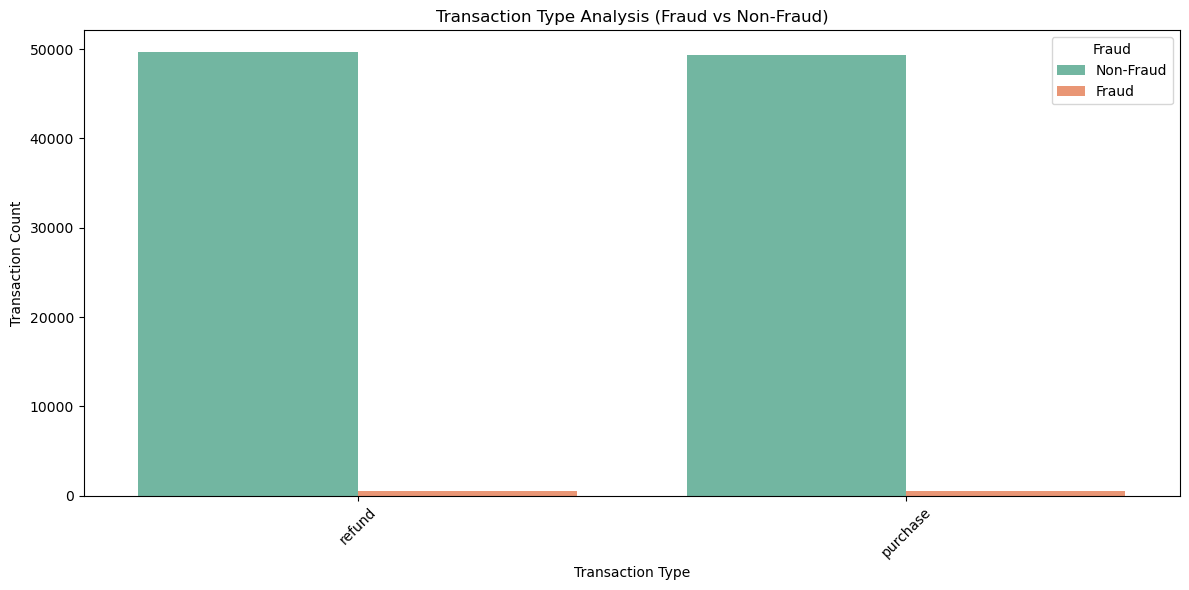

In [25]:
plt.figure(figsize=(12, 6))

sns.countplot(x='TransactionTypeLabel', hue='IsFraud', data=data, palette='Set2')
plt.title('Transaction Type Analysis (Fraud vs Non-Fraud)')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Count')
plt.legend(title='Fraud', loc='upper right', labels=['Non-Fraud', 'Fraud'])
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

/tmp/ipykernel_6791/535847870.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TransactionTypeLabel', data=fraud_data, palette='Set2')


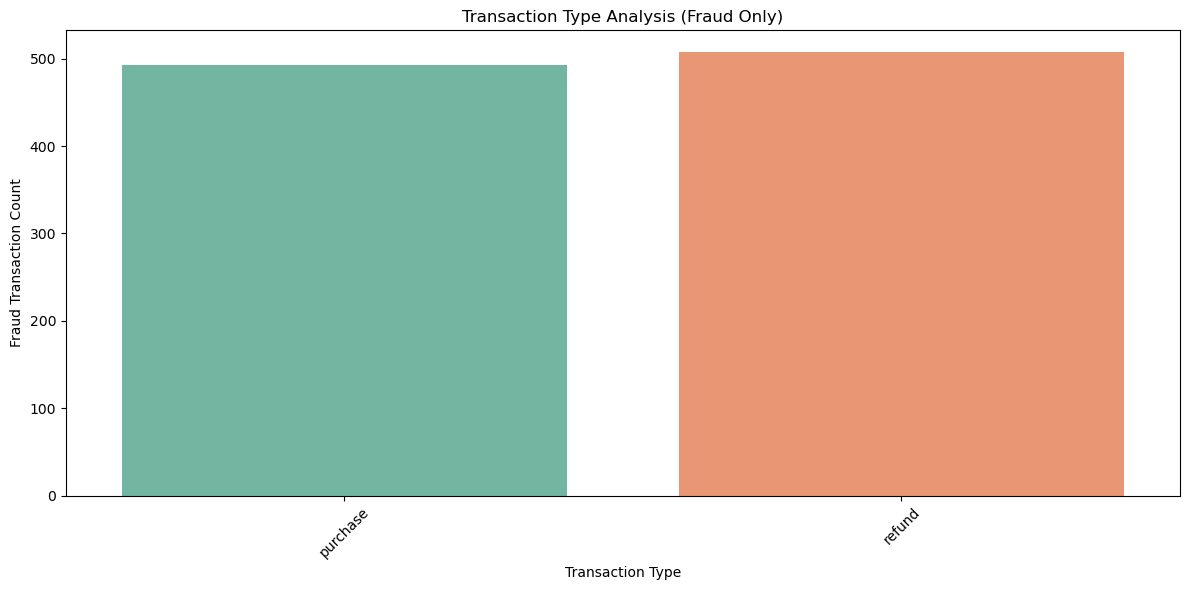

In [26]:
plt.figure(figsize=(12, 6))

fraud_data = data[data['IsFraud'] == 1]

sns.countplot(x='TransactionTypeLabel', data=fraud_data, palette='Set2')
plt.title('Transaction Type Analysis (Fraud Only)')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Transaction Count')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()
plt.show()

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   TransactionID         100000 non-null  int64  
 1   Amount                100000 non-null  float64
 2   MerchantID            100000 non-null  int64  
 3   TransactionType       100000 non-null  int64  
 4   Location              100000 non-null  int64  
 5   IsFraud               100000 non-null  int64  
 6   TransactionHour       100000 non-null  int32  
 7   TransactionDay        100000 non-null  int32  
 8   TransactionMonth      100000 non-null  int32  
 9   TransactionTypeLabel  100000 non-null  object 
 10  LocationLabel         100000 non-null  object 
dtypes: float64(1), int32(3), int64(5), object(2)
memory usage: 7.2+ MB


In [28]:
data_model = data.drop(columns=['TransactionID', 'TransactionTypeLabel', 'LocationLabel', 'MerchantID'])

X = data_model.drop(columns=['IsFraud'])
y = data_model['IsFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression


models = {
    "Logistic Regression": LogisticRegression(random_state=42),
  
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    models[model_name] = model  



Logistic Regression Accuracy: 0.99

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     29700
           1       0.00      0.00      0.00       300

    accuracy                           0.99     30000
   macro avg       0.49      0.50      0.50     30000
weighted avg       0.98      0.99      0.99     30000



/home/soorya/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/soorya/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/soorya/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


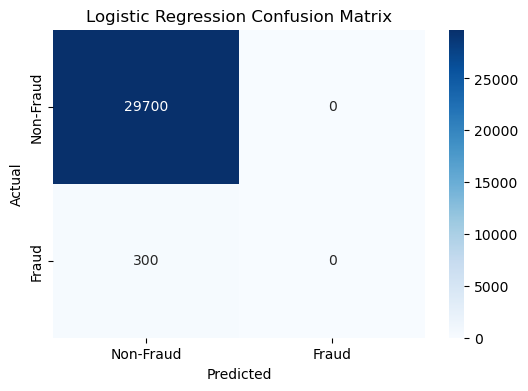

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluation dictionary to store results
evaluation_results = {}

# Evaluasi setiap model
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    
    # Hitung accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Classification report
    clf_report = classification_report(y_test, y_pred)
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Store results in dictionary
    evaluation_results[model_name] = {
        "accuracy": accuracy,
        "classification_report": clf_report,
        "confusion_matrix": conf_matrix
    }
    
    # Print evaluation for each model
    print(f"\n{model_name} Accuracy: {accuracy}")
    print(f"\n{model_name} Classification Report:\n", clf_report)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   TransactionID         100000 non-null  int64  
 1   Amount                100000 non-null  float64
 2   MerchantID            100000 non-null  int64  
 3   TransactionType       100000 non-null  int64  
 4   Location              100000 non-null  int64  
 5   IsFraud               100000 non-null  int64  
 6   TransactionHour       100000 non-null  int32  
 7   TransactionDay        100000 non-null  int32  
 8   TransactionMonth      100000 non-null  int32  
 9   TransactionTypeLabel  100000 non-null  object 
 10  LocationLabel         100000 non-null  object 
dtypes: float64(1), int32(3), int64(5), object(2)
memory usage: 7.2+ MB


In [33]:
data = data.drop(['TransactionID', 'TransactionTypeLabel', 'LocationLabel'], axis=1)

In [34]:
X = data.drop('IsFraud', axis=1)
y = data['IsFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [36]:
# Print the count before SMOTE
print("Before SMOTE:")
print(f"Train Data - Positive class (Fraud): {y_train.sum()} | Negative class (Non-Fraud): {(y_train == 0).sum()}")
print(f"Test Data - Positive class (Fraud): {y_test.sum()} | Negative class (Non-Fraud): {(y_test == 0).sum()}")

Before SMOTE:
Train Data - Positive class (Fraud): 787 | Negative class (Non-Fraud): 79213
Test Data - Positive class (Fraud): 213 | Negative class (Non-Fraud): 19787


In [37]:
# Print the count after SMOTE
print("\nAfter SMOTE (Training Data):")
print(f"Train Data - Positive class (Fraud): {y_train_res.sum()} | Negative class (Non-Fraud): {(y_train_res == 0).sum()}")
print(f"Train Data Shape: {X_train_res.shape}")

print("\nTest Data (No Change):")
print(f"Test Data - Positive class (Fraud): {y_test.sum()} | Negative class (Non-Fraud): {(y_test == 0).sum()}")
print(f"Test Data Shape: {X_test.shape}")


After SMOTE (Training Data):
Train Data - Positive class (Fraud): 79213 | Negative class (Non-Fraud): 79213
Train Data Shape: (158426, 7)

Test Data (No Change):
Test Data - Positive class (Fraud): 213 | Negative class (Non-Fraud): 19787
Test Data Shape: (20000, 7)


In [38]:
for model_name, model in models.items():
    model.fit(X_train_res, y_train_res)
    models[model_name] = model  

/home/soorya/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Accuracy: 0.5205

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.52      0.68     19787
           1       0.01      0.46      0.02       213

    accuracy                           0.52     20000
   macro avg       0.50      0.49      0.35     20000
weighted avg       0.98      0.52      0.68     20000



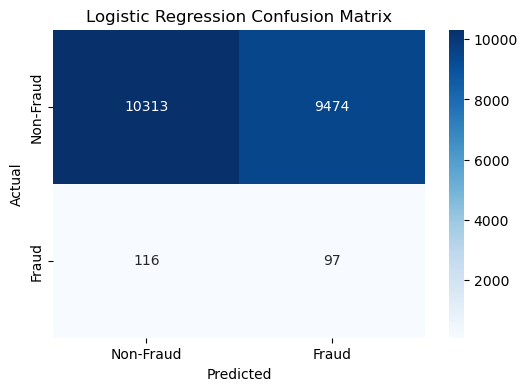

In [39]:
# Evaluation dictionary to store results
evaluation_results = {}

# Evaluasi setiap model
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    
    # Hitung accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Classification report
    clf_report = classification_report(y_test, y_pred)
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Store results in dictionary
    evaluation_results[model_name] = {
        "accuracy": accuracy,
        "classification_report": clf_report,
        "confusion_matrix": conf_matrix
    }
    
    # Print evaluation for each model
    print(f"\n{model_name} Accuracy: {accuracy}")
    print(f"\n{model_name} Classification Report:\n", clf_report)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


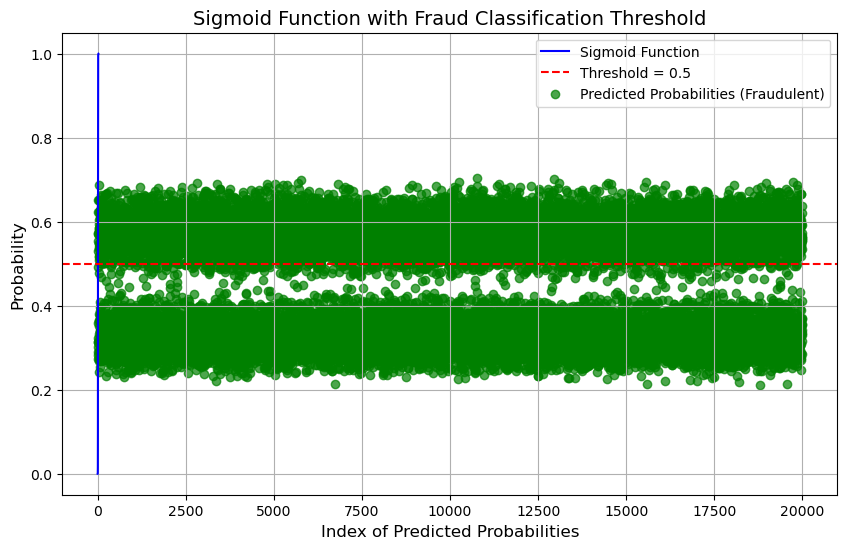

In [40]:
import numpy as np

# Get the predicted probabilities for the positive class (Fraudulent)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Define a sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate a range of values for the sigmoid curve
x_values = np.linspace(-10, 10, 200)
y_values = sigmoid(x_values)

# Set a threshold for classification (commonly 0.5)
threshold = 0.5

# Plot the sigmoid curve
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label="Sigmoid Function", color="blue")

# Add the threshold line
plt.axhline(y=threshold, color='red', linestyle='--', label=f"Threshold = {threshold}")

# Scatter plot for the predicted probabilities
plt.scatter(range(len(y_pred_prob)), y_pred_prob, alpha=0.7, label="Predicted Probabilities (Fraudulent)", color="green")

# Add titles and labels
plt.title("Sigmoid Function with Fraud Classification Threshold", fontsize=14)
plt.xlabel("Index of Predicted Probabilities", fontsize=12)
plt.ylabel("Probability", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


In [41]:
import pickle

# Replace 'model' with your trained model variable name
with open('models/creditcard_model.pkl', 'wb') as f:
    pickle.dump(model, f)


Top 10 Features (SHAP):
            feature  shap_importance
2   TransactionType         0.522130
0            Amount         0.097135
6  TransactionMonth         0.069878
1        MerchantID         0.061678
4   TransactionHour         0.051352
3          Location         0.043276
5    TransactionDay         0.028238


/home/soorya/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


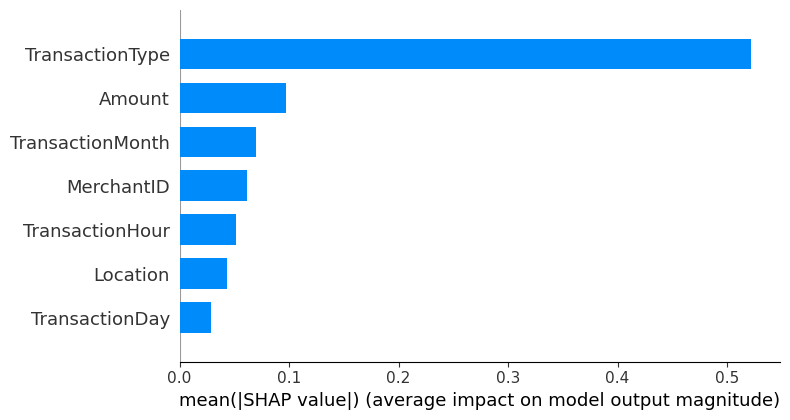

In [44]:
import shap

# For logistic regression, use LinearExplainer
explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer.shap_values(X_test)

# Get feature importance
feature_importance_shap = pd.DataFrame({
    'feature': X_test.columns,
    'shap_importance': np.abs(shap_values).mean(0)
}).sort_values('shap_importance', ascending=False)

print("Top 10 Features (SHAP):")
print(feature_importance_shap.head(10))

# Visualize SHAP summary
shap.summary_plot(shap_values, X_test, plot_type="bar")